In [375]:
'''
NAME== G.KAVYASRI
Roll== CS20B1126
1. Perform the KNN on Sonar dataset with and without in-built functions for K=1, 3, 5, 7.
2. Break the 60 features into 6 subsets having 10 features each. 
Perform the KNN and then compare the performance.
3. Divide them into 6 subsets and perform the classification on each subset. Then perform the majority voting for classification.
4. Also, perform the same tasks for 5 subsets.

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [376]:
df=pd.read_csv("sonar.all-data.csv")
print(df)


          1       2       3       4       5       6       7       8       9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         10  ...      52      53      54      55   

In [377]:
#remove missing elements

df.isna().sum().sum()

0

In [378]:
X=df.drop('61',axis=1)
print(X)
print("\n")


          1       2       3       4       5       6       7       8       9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         10  ...      51      52      53      54   

In [379]:

y=df['61']
print(y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 61, Length: 208, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

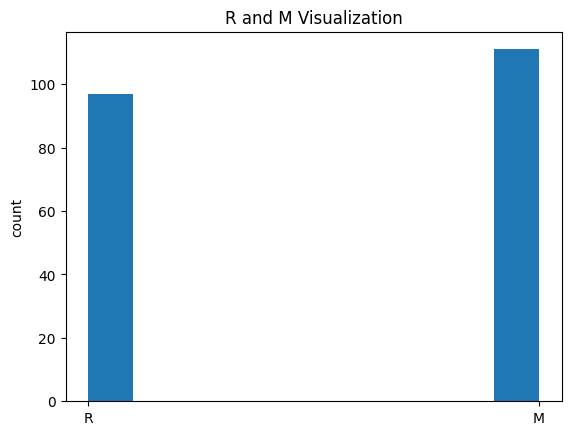

In [380]:
plt.hist(y)
plt.title("R and M Visualization")
plt.ylabel("count")
plt.show

In [381]:
#1. Perform the KNN on Sonar dataset with in-built functions for K=1, 3, 5, 7.from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 155)

In [382]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X_train)

scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

#k=1
knn_model1=KNeighborsClassifier(n_neighbors=1)
knn_model1.fit(scaled_X_train, y_train)
y_pred1=knn_model1.predict(scaled_X_test)

print(pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred1}))
print('\n')
accuracy1=accuracy_score(y_test,y_pred1)
print(f'accuracy1 == {accuracy1}')
# print('\n')
# print(classification_report(y_test, y_pred1))

    y_Test y_Pred
135      M      M
178      M      M
141      M      M
156      M      M
98       M      M
48       R      R
60       R      R
163      M      M
190      M      M
94       R      R
65       R      R
22       R      R
61       R      R
176      M      M
11       R      R
148      M      M
179      M      M
38       R      R
93       R      M
14       R      R
166      M      R
33       R      M
187      M      M
120      M      M
161      M      M
160      M      M
75       R      R
7        R      M
198      M      M
129      M      M
157      M      M
202      M      M
158      M      M
35       R      R
175      M      M
2        R      R
13       R      R
90       R      R
167      M      M
134      M      M
174      M      M
78       R      R
12       R      M
5        R      R
74       R      R
101      M      R
20       R      R
77       R      R
18       R      R
207      M      M
91       R      M
131      M      M


accuracy1 == 0.8653846153846154


          

In [384]:
#k=3
knn_model3=KNeighborsClassifier(n_neighbors=3)
knn_model3.fit(scaled_X_train, y_train)
y_pred3=knn_model3.predict(scaled_X_test)

print(pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred3}))
print('\n')
accuracy3=accuracy_score(y_test,y_pred3)
print(f'accuracy3 == {accuracy3}')
print('\n')
print(classification_report(y_test, y_pred3))

    y_Test y_Pred
135      M      M
178      M      M
141      M      M
156      M      M
98       M      M
48       R      R
60       R      R
163      M      M
190      M      M
94       R      M
65       R      R
22       R      R
61       R      R
176      M      M
11       R      R
148      M      R
179      M      M
38       R      R
93       R      M
14       R      R
166      M      M
33       R      M
187      M      M
120      M      M
161      M      M
160      M      M
75       R      R
7        R      M
198      M      M
129      M      M
157      M      M
202      M      M
158      M      R
35       R      M
175      M      M
2        R      R
13       R      R
90       R      M
167      M      M
134      M      M
174      M      M
78       R      R
12       R      M
5        R      R
74       R      R
101      M      M
20       R      R
77       R      R
18       R      R
207      M      M
91       R      M
131      M      M


accuracy3 == 0.8076923076923077


          

In [385]:
#k=5
knn_model5=KNeighborsClassifier(n_neighbors=5)
knn_model5.fit(scaled_X_train, y_train)
y_pred5=knn_model5.predict(scaled_X_test)

print(pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred5}))
print('\n')
accuracy5=accuracy_score(y_test,y_pred5)
print(f'accuracy5 == {accuracy5}')
print('\n')
print(classification_report(y_test, y_pred5))

    y_Test y_Pred
135      M      M
178      M      M
141      M      M
156      M      M
98       M      M
48       R      R
60       R      R
163      M      R
190      M      M
94       R      M
65       R      R
22       R      R
61       R      R
176      M      M
11       R      R
148      M      M
179      M      M
38       R      R
93       R      M
14       R      M
166      M      M
33       R      M
187      M      M
120      M      R
161      M      M
160      M      M
75       R      M
7        R      M
198      M      M
129      M      M
157      M      M
202      M      M
158      M      R
35       R      M
175      M      M
2        R      M
13       R      R
90       R      M
167      M      M
134      M      M
174      M      M
78       R      M
12       R      M
5        R      R
74       R      R
101      M      M
20       R      R
77       R      M
18       R      R
207      M      M
91       R      M
131      M      M


accuracy5 == 0.6923076923076923


          

In [386]:
#k=7
knn_model7=KNeighborsClassifier(n_neighbors=7)
knn_model7.fit(scaled_X_train, y_train)
y_pred7=knn_model7.predict(scaled_X_test)

print(pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred7}))
print('\n')
accuracy7=accuracy_score(y_test,y_pred7)
print(f'accuracy7 == {accuracy7}')
print('\n')
print(classification_report(y_test, y_pred7))

    y_Test y_Pred
135      M      M
178      M      M
141      M      M
156      M      M
98       M      M
48       R      R
60       R      R
163      M      R
190      M      M
94       R      M
65       R      R
22       R      R
61       R      R
176      M      M
11       R      R
148      M      M
179      M      M
38       R      R
93       R      M
14       R      R
166      M      M
33       R      M
187      M      M
120      M      R
161      M      M
160      M      M
75       R      M
7        R      M
198      M      M
129      M      M
157      M      M
202      M      M
158      M      R
35       R      M
175      M      M
2        R      M
13       R      R
90       R      M
167      M      R
134      M      M
174      M      M
78       R      M
12       R      M
5        R      R
74       R      R
101      M      M
20       R      M
77       R      M
18       R      R
207      M      M
91       R      M
131      M      M


accuracy7 == 0.6730769230769231


          

In [387]:
#Without in built function
# Calculate distance between two points

def minkowski_distance(a, b, p=2):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

In [388]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 75% train, 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=155)

# Scale the X data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [389]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of M prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        
        counter = Counter(y_train[df_nn.index])
        
        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=1, p=2)

print(y_hat_test)

['M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M']


In [390]:
# Get test accuracy score

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))

0.8653846153846154


In [391]:
# Testing to see results from sklearn.neighbors.KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1, p=2)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
acc=accuracy_score(y_test, y_pred_test)
print(f"Sklearn KNN Accuracy: {acc}")
print(f'acc percentage :{acc*100}')


Sklearn KNN Accuracy: 0.8653846153846154
acc percentage :86.53846153846155


In [392]:

#K=1

# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=1, p=2)
print(y_hat_test)

acc=accuracy_score(y_test, y_hat_test)
print(f"Sklearn KNN Accuracy: {acc}")
print(f'acc percentage :{acc*100}')

['M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M']
Sklearn KNN Accuracy: 0.8653846153846154
acc percentage :86.53846153846155


In [393]:

#K=3

# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=3, p=2)
print(y_hat_test)

acc=accuracy_score(y_test, y_hat_test)
print(f"Sklearn KNN Accuracy: {acc}")
print(f'acc percentage :{acc*100}')

['M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M']
Sklearn KNN Accuracy: 0.8076923076923077
acc percentage :80.76923076923077


In [394]:
#K=5


# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5, p=2)
print(y_hat_test)

acc=accuracy_score(y_test, y_hat_test)
print(f"Sklearn KNN Accuracy: {acc}")
print(f'acc percentage :{acc*100}')

['M', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'M']
Sklearn KNN Accuracy: 0.6923076923076923
acc percentage :69.23076923076923


In [395]:
#K=7


# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=7, p=2)
print(y_hat_test)

acc=accuracy_score(y_test, y_hat_test)
print(f"Sklearn KNN Accuracy: {acc}")
print(f'acc percentage :{acc*100}')

['M', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'M']
Sklearn KNN Accuracy: 0.6730769230769231
acc percentage :67.3076923076923


In [396]:
#for k=1,3,5,7
for i in range(8):
     if(i%2!=0):
            # Make predictions on test dataset
            y_hat_test=knn_predict(X_train, X_test, y_train, y_test, k=i, p=2)
            #print(y_hat_test)

            acc=accuracy_score(y_test, y_hat_test)
            print(f"Sklearn KNN Accuracy for k={i} is : {acc}")
            print(f'acc percentage for k={i} :{acc*100}')
            print("\n")

Sklearn KNN Accuracy for k=1 is : 0.8653846153846154
acc percentage for k=1 :86.53846153846155


Sklearn KNN Accuracy for k=3 is : 0.8076923076923077
acc percentage for k=3 :80.76923076923077


Sklearn KNN Accuracy for k=5 is : 0.6923076923076923
acc percentage for k=5 :69.23076923076923


Sklearn KNN Accuracy for k=7 is : 0.6730769230769231
acc percentage for k=7 :67.3076923076923




In [397]:
#2. Break the 60 features into 6 subsets having 10 features each. Perform the KNN and then compare the performance.

df1 = df.iloc[:,0:10]
df2 = df.iloc[:,10:20]
df3 = df.iloc[:,20:30]
df4 = df.iloc[:,30:40]
df5 = df.iloc[:,40:50]
df6 = df.iloc[:,50:60]

y = df["61"]


In [398]:
#with first subset --subset1


#split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1,y, test_size = 0.25, random_state=155)
#k=5 for all sets 
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred=knn_model.predict(X_test)

pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred})
#print(pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred}))
# print('\n')
accuracy=accuracy_score(y_test,y_pred)
print(f'accuracy == {accuracy}')
print(f'accuracy percentage == {accuracy*100}')
print('\n')
print(classification_report(y_test, y_pred))

accuracy == 0.7307692307692307
accuracy percentage == 73.07692307692307


              precision    recall  f1-score   support

           M       0.69      0.89      0.77        27
           R       0.82      0.56      0.67        25

    accuracy                           0.73        52
   macro avg       0.75      0.72      0.72        52
weighted avg       0.75      0.73      0.72        52



In [399]:
#with second subset --subset2


#split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2,y, test_size = 0.25, random_state=155)
#k=5 for all sets 
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred=knn_model.predict(X_test)

pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred})
#print(pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred}))
# print('\n')
accuracy=accuracy_score(y_test,y_pred)
print(f'accuracy == {accuracy}')
print(f'accuracy percentage == {accuracy*100}')
print('\n')
print(classification_report(y_test, y_pred))

accuracy == 0.5961538461538461
accuracy percentage == 59.61538461538461


              precision    recall  f1-score   support

           M       0.57      0.89      0.70        27
           R       0.70      0.28      0.40        25

    accuracy                           0.60        52
   macro avg       0.64      0.58      0.55        52
weighted avg       0.63      0.60      0.55        52



In [400]:

#subset_3


#split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3,y, test_size = 0.25, random_state=155)
#k=5 for all sets 
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred=knn_model.predict(X_test)

pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred})
#print(pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred}))
# print('\n')
accuracy=accuracy_score(y_test,y_pred)
print(f'accuracy == {accuracy}')
print(f'accuracy percentage == {accuracy*100}')
print('\n')
print(classification_report(y_test, y_pred))


accuracy == 0.6346153846153846
accuracy percentage == 63.46153846153846


              precision    recall  f1-score   support

           M       0.62      0.78      0.69        27
           R       0.67      0.48      0.56        25

    accuracy                           0.63        52
   macro avg       0.64      0.63      0.62        52
weighted avg       0.64      0.63      0.63        52



In [401]:

#subset_4


#split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df4,y, test_size = 0.25, random_state=155)
#k=5 for all sets 
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred=knn_model.predict(X_test)

pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred})
#print(pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred}))
# print('\n')
accuracy=accuracy_score(y_test,y_pred)
print(f'accuracy == {accuracy}')
print(f'accuracy percentage == {accuracy*100}')
print('\n')
print(classification_report(y_test, y_pred))


accuracy == 0.6346153846153846
accuracy percentage == 63.46153846153846


              precision    recall  f1-score   support

           M       0.63      0.70      0.67        27
           R       0.64      0.56      0.60        25

    accuracy                           0.63        52
   macro avg       0.63      0.63      0.63        52
weighted avg       0.63      0.63      0.63        52



In [402]:

#subset_5


#split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df5,y, test_size = 0.25, random_state=155)
#k=5 for all sets 
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred=knn_model.predict(X_test)

pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred})
# print(pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred}))
# print('\n')
accuracy=accuracy_score(y_test,y_pred)
print(f'accuracy == {accuracy}')
print(f'accuracy percentage == {accuracy*100}')
print('\n')
print(classification_report(y_test, y_pred))

accuracy == 0.6730769230769231
accuracy percentage == 67.3076923076923


              precision    recall  f1-score   support

           M       0.67      0.74      0.70        27
           R       0.68      0.60      0.64        25

    accuracy                           0.67        52
   macro avg       0.67      0.67      0.67        52
weighted avg       0.67      0.67      0.67        52



In [403]:

#subset_6


#split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df6,y, test_size = 0.25, random_state=155)
#k=5 for all sets 
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred=knn_model.predict(X_test)

pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred})
# print(pd.DataFrame({'y_Test': y_test,'y_Pred':y_pred}))
# print('\n')
accuracy=accuracy_score(y_test,y_pred)
print(f'accuracy == {accuracy}')
print(f'accuracy percentage == {accuracy*100}')
print('\n')
print(classification_report(y_test, y_pred))

accuracy == 0.6538461538461539
accuracy percentage == 65.38461538461539


              precision    recall  f1-score   support

           M       0.65      0.74      0.69        27
           R       0.67      0.56      0.61        25

    accuracy                           0.65        52
   macro avg       0.66      0.65      0.65        52
weighted avg       0.66      0.65      0.65        52



In [404]:
df1 = df.iloc[:,0:10]
df2 = df.iloc[:,10:20]
df3 = df.iloc[:,20:30]
df4 = df.iloc[:,30:40]
df5 = df.iloc[:,40:50]
df6 = df.iloc[:,50:60]

y = df["61"]

X1_train, X1_test, y1_train, y1_test = train_test_split(df1,y, test_size = 0.25, random_state=155)            
X2_train, X2_test, y2_train, y2_test = train_test_split(df2,y, test_size = 0.25, random_state=155)
X3_train, X3_test, y3_train, y3_test = train_test_split(df3,y, test_size = 0.25, random_state=155)
X4_train, X4_test, y4_train, y4_test = train_test_split(df4,y, test_size = 0.25, random_state=155)
X5_train, X5_test, y5_train, y5_test = train_test_split(df5,y, test_size = 0.25, random_state=155)
X6_train, X6_test, y6_train, y6_test = train_test_split(df6,y, test_size = 0.25, random_state=155)



In [415]:

for i in range(8):
     if(i%2!=0):
            knn_model1=KNeighborsClassifier(n_neighbors=i)
            knn_model2=KNeighborsClassifier(n_neighbors=i)
            knn_model3=KNeighborsClassifier(n_neighbors=i)
            knn_model4=KNeighborsClassifier(n_neighbors=i)
            knn_model5=KNeighborsClassifier(n_neighbors=i)
            knn_model6=KNeighborsClassifier(n_neighbors=i)
            
            knn_model1.fit(X1_train, y1_train)
            knn_model2.fit(X2_train, y2_train)
            knn_model3.fit(X3_train, y3_train)
            knn_model4.fit(X4_train, y4_train)
            knn_model5.fit(X5_train, y5_train)
            knn_model6.fit(X6_train, y6_train)


            y_pred1=knn_model1.predict(X1_test)
            y_pred2=knn_model2.predict(X2_test)
            y_pred3=knn_model3.predict(X3_test)
            y_pred4=knn_model4.predict(X4_test)
            y_pred5=knn_model5.predict(X5_test)
            y_pred6=knn_model6.predict(X6_test)

            accuracy1=accuracy_score(y1_test,y_pred1)
            accuracy2=accuracy_score(y2_test,y_pred2)
            accuracy3=accuracy_score(y3_test,y_pred3)
            accuracy4=accuracy_score(y4_test,y_pred4)
            accuracy5=accuracy_score(y5_test,y_pred5)
            accuracy6=accuracy_score(y6_test,y_pred6)
            
            print(f'accuracy percentage for subset1 with k={i} is {accuracy1*100}')
            #print(pd.DataFrame({'y_Test': y1_test,'y_Pred':y_pred1}))
            print(f'accuracy percentage for subset2 with k={i} is {accuracy2*100}')
            #print(pd.DataFrame({'y_Test': y2_test,'y_Pred':y_pred2}))
            print(f'accuracy percentage for subset3 with k={i} is {accuracy3*100}')
            #print(pd.DataFrame({'y_Test': y3_test,'y_Pred':y_pred3}))
            print(f'accuracy percentage for subset4 with k={i} is {accuracy4*100}')
            #print(pd.DataFrame({'y_Test': y4_test,'y_Pred':y_pred4}))
            print(f'accuracy percentage for subset5 with k={i} is  {accuracy5*100}')
            #print(pd.DataFrame({'y_Test': y5_test,'y_Pred':y_pred5}))
            print(f'accuracy percentage for subset6 with k={i} is  {accuracy6*100}')
            #print(pd.DataFrame({'y_Test': y6_test,'y_Pred':y_pred6}))
            
            a=max(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6)
            print(f'majority voting for  {a*100}')
            print("\n")




# print(classification_report(y1_test, y_pred1))
# print(classification_report(y2_test, y_pred2))
# print(classification_report(y3_test, y_pred3))
# print(classification_report(y4_test, y_pred4))
# print(classification_report(y5_test, y_pred5))
# print(classification_report(y6_test, y_pred6))

accuracy percentage for subset1 with k=1 is 67.3076923076923
accuracy percentage for subset2 with k=1 is 69.23076923076923
accuracy percentage for subset3 with k=1 is 59.61538461538461
accuracy percentage for subset4 with k=1 is 69.23076923076923
accuracy percentage for subset5 with k=1 is  71.15384615384616
accuracy percentage for subset6 with k=1 is  57.692307692307686
higher priority for 71.15384615384616


accuracy percentage for subset1 with k=3 is 69.23076923076923
accuracy percentage for subset2 with k=3 is 65.38461538461539
accuracy percentage for subset3 with k=3 is 65.38461538461539
accuracy percentage for subset4 with k=3 is 63.46153846153846
accuracy percentage for subset5 with k=3 is  61.53846153846154
accuracy percentage for subset6 with k=3 is  61.53846153846154
higher priority for 69.23076923076923


accuracy percentage for subset1 with k=5 is 73.07692307692307
accuracy percentage for subset2 with k=5 is 59.61538461538461
accuracy percentage for subset3 with k=5 is 63.4

In [406]:
#Divide them into 6 subsets and perform the classification on each subset. 
#Then perform the majority voting for classification.



In [411]:

con = np.stack((y_pred1, y_pred2,y_pred3, y_pred4, y_pred5,y_pred6),axis = 1)
print(con)

(m,n)=con.shape
print(m,n)

#majority voting for classification
list=[]

for i in range(m):
    countm = 0
    countr = 0
    for j in range(n):
        if con[i,j] == "M":
            countm = countm+1
        if con[i,j] == "R":
            countr = countr+1
    if countm>countr:
        list.append("M")
    else: 
        list.append("R")
    
print(list)
            

[['M' 'M' 'R' 'M' 'R' 'M']
 ['M' 'M' 'R' 'M' 'R' 'M']
 ['M' 'M' 'M' 'M' 'M' 'M']
 ['M' 'M' 'R' 'R' 'M' 'M']
 ['M' 'M' 'M' 'M' 'R' 'M']
 ['R' 'M' 'R' 'R' 'M' 'R']
 ['R' 'R' 'M' 'R' 'R' 'R']
 ['M' 'M' 'M' 'M' 'M' 'R']
 ['R' 'M' 'M' 'M' 'R' 'M']
 ['M' 'R' 'M' 'M' 'R' 'R']
 ['R' 'R' 'R' 'R' 'R' 'M']
 ['R' 'M' 'R' 'M' 'M' 'M']
 ['M' 'R' 'M' 'R' 'R' 'R']
 ['M' 'M' 'M' 'M' 'M' 'R']
 ['R' 'M' 'M' 'M' 'R' 'M']
 ['M' 'M' 'R' 'M' 'M' 'M']
 ['M' 'M' 'R' 'M' 'M' 'R']
 ['R' 'R' 'M' 'R' 'R' 'M']
 ['M' 'M' 'R' 'M' 'R' 'R']
 ['M' 'M' 'R' 'M' 'M' 'M']
 ['M' 'R' 'R' 'M' 'M' 'M']
 ['R' 'M' 'M' 'M' 'M' 'M']
 ['M' 'M' 'M' 'M' 'R' 'M']
 ['R' 'M' 'M' 'R' 'M' 'R']
 ['M' 'R' 'M' 'R' 'M' 'M']
 ['M' 'M' 'M' 'R' 'M' 'M']
 ['R' 'M' 'M' 'M' 'R' 'M']
 ['M' 'M' 'R' 'M' 'R' 'R']
 ['M' 'M' 'M' 'M' 'M' 'M']
 ['M' 'M' 'M' 'M' 'M' 'M']
 ['M' 'M' 'M' 'R' 'M' 'M']
 ['M' 'M' 'R' 'M' 'M' 'M']
 ['M' 'M' 'M' 'R' 'M' 'M']
 ['M' 'R' 'R' 'M' 'R' 'M']
 ['M' 'M' 'M' 'M' 'M' 'R']
 ['M' 'M' 'M' 'M' 'R' 'R']
 ['M' 'M' 'R' 'R' 'M' 'M']
 

In [ ]:
#4. Also, perform the same tasks for 5 subsets.

df41 = df.iloc[:,0:12]
df42 = df.iloc[:,12:24]
df43 = df.iloc[:,24:36]
df44 = df.iloc[:,36:48]
df45 = df.iloc[:,48:60]


y = df["61"]


In [416]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df41,y, test_size = 0.25, random_state=155)            
X2_train, X2_test, y2_train, y2_test = train_test_split(df42,y, test_size = 0.25, random_state=155)
X3_train, X3_test, y3_train, y3_test = train_test_split(df43,y, test_size = 0.25, random_state=155)
X4_train, X4_test, y4_train, y4_test = train_test_split(df44,y, test_size = 0.25, random_state=155)
X5_train, X5_test, y5_train, y5_test = train_test_split(df45,y, test_size = 0.25, random_state=155)

for i in range(8):
     if(i%2!=0):
            knn_model41=KNeighborsClassifier(n_neighbors=i)
            knn_model42=KNeighborsClassifier(n_neighbors=i)
            knn_model43=KNeighborsClassifier(n_neighbors=i)
            knn_model44=KNeighborsClassifier(n_neighbors=i)
            knn_model45=KNeighborsClassifier(n_neighbors=i)


            knn_model41.fit(X1_train, y1_train)
            knn_model42.fit(X2_train, y2_train)
            knn_model43.fit(X3_train, y3_train)
            knn_model44.fit(X4_train, y4_train)
            knn_model45.fit(X5_train, y5_train)
            
            y_pred41=knn_model41.predict(X1_test)
            y_pred42=knn_model42.predict(X2_test)
            y_pred43=knn_model43.predict(X3_test)
            y_pred44=knn_model44.predict(X4_test)
            y_pred45=knn_model45.predict(X5_test)
            
            accuracy41=accuracy_score(y1_test,y_pred41)
            accuracy42=accuracy_score(y2_test,y_pred42)
            accuracy43=accuracy_score(y3_test,y_pred43)
            accuracy44=accuracy_score(y4_test,y_pred44)
            accuracy45=accuracy_score(y5_test,y_pred45)
            
            print(f'accuracy percentage for subset1 with k={i} is {accuracy41*100}')
            #print(pd.DataFrame({'y_Test': y1_test,'y_Pred':y_pred41}))
            print(f'accuracy percentage for subset2 with k={i} is {accuracy42*100}')
            #print(pd.DataFrame({'y_Test': y2_test,'y_Pred':y_pred42}))
            print(f'accuracy percentage for subset3 with k={i} is {accuracy43*100}')
            #print(pd.DataFrame({'y_Test': y3_test,'y_Pred':y_pred43}))
            print(f'accuracy percentage for subset4 with k={i} is {accuracy44*100}')
            #print(pd.DataFrame({'y_Test': y4_test,'y_Pred':y_pred44}))
            print(f'accuracy percentage for subset5 with k={i} is {accuracy45*100}')
            #print(pd.DataFrame({'y_Test': y5_test,'y_Pred':y_pred45}))
            
            
            a=max(accuracy41,accuracy42,accuracy43,accuracy44,accuracy45)
            print(f'majority voting for  {a*100}')
            print("\n")
            
            '''
            print(classification_report(y1_test, y_pred41))
            print(classification_report(y2_test, y_pred42))
            print(classification_report(y3_test, y_pred43))
            print(classification_report(y4_test, y_pred44))
            print(classification_report(y5_test, y_pred45))
            
            
            
            '''

accuracy percentage for subset1 with k=1 is 75.0
accuracy percentage for subset2 with k=1 is 65.38461538461539
accuracy percentage for subset3 with k=1 is 67.3076923076923
accuracy percentage for subset4 with k=1 is 73.07692307692307
accuracy percentage for subset5 with k=1 is 59.61538461538461
majority voting for  75.0


accuracy percentage for subset1 with k=3 is 76.92307692307693
accuracy percentage for subset2 with k=3 is 51.92307692307693
accuracy percentage for subset3 with k=3 is 59.61538461538461
accuracy percentage for subset4 with k=3 is 71.15384615384616
accuracy percentage for subset5 with k=3 is 57.692307692307686
majority voting for  76.92307692307693


accuracy percentage for subset1 with k=5 is 75.0
accuracy percentage for subset2 with k=5 is 46.15384615384615
accuracy percentage for subset3 with k=5 is 55.769230769230774
accuracy percentage for subset4 with k=5 is 67.3076923076923
accuracy percentage for subset5 with k=5 is 67.3076923076923
majority voting for  75.0




In [412]:

con = np.stack((y_pred41, y_pred42,y_pred43, y_pred44, y_pred45),axis = 1)
print(con)

(m,n)=con.shape
print(m,n)

#majority voting for classification
list=[]

for i in range(m):
    countm = 0
    countr = 0
    for j in range(n):
        if con[i,j] == "M":
            countm = countm+1
        if con[i,j] == "R":
            countr = countr+1
    if countm>countr:
        list.append("M")
    else: 
        list.append("R")
    
print(list)

[['M' 'M' 'M' 'R' 'M']
 ['M' 'R' 'M' 'R' 'R']
 ['M' 'M' 'M' 'M' 'M']
 ['M' 'R' 'R' 'M' 'M']
 ['M' 'M' 'M' 'M' 'M']
 ['R' 'M' 'M' 'R' 'R']
 ['R' 'R' 'R' 'R' 'R']
 ['M' 'M' 'R' 'M' 'R']
 ['M' 'M' 'M' 'M' 'M']
 ['R' 'M' 'M' 'R' 'R']
 ['R' 'R' 'R' 'R' 'R']
 ['R' 'R' 'M' 'R' 'M']
 ['R' 'R' 'R' 'R' 'R']
 ['M' 'M' 'R' 'R' 'R']
 ['R' 'M' 'R' 'R' 'R']
 ['M' 'M' 'M' 'M' 'M']
 ['M' 'M' 'R' 'M' 'M']
 ['R' 'R' 'R' 'R' 'M']
 ['M' 'M' 'R' 'M' 'R']
 ['M' 'R' 'R' 'R' 'R']
 ['R' 'R' 'M' 'M' 'M']
 ['R' 'M' 'R' 'M' 'M']
 ['M' 'M' 'M' 'M' 'M']
 ['M' 'M' 'M' 'M' 'R']
 ['M' 'R' 'R' 'M' 'M']
 ['M' 'R' 'R' 'M' 'M']
 ['R' 'M' 'R' 'R' 'R']
 ['M' 'M' 'M' 'R' 'R']
 ['M' 'M' 'M' 'M' 'M']
 ['M' 'M' 'M' 'R' 'M']
 ['M' 'R' 'R' 'M' 'M']
 ['M' 'M' 'M' 'M' 'M']
 ['M' 'R' 'R' 'M' 'M']
 ['M' 'R' 'M' 'R' 'M']
 ['M' 'M' 'R' 'R' 'R']
 ['M' 'R' 'M' 'R' 'M']
 ['M' 'M' 'R' 'M' 'M']
 ['M' 'R' 'R' 'M' 'R']
 ['R' 'R' 'M' 'M' 'M']
 ['M' 'M' 'R' 'M' 'M']
 ['M' 'M' 'R' 'M' 'R']
 ['R' 'M' 'R' 'M' 'M']
 ['R' 'M' 'M' 'R' 'R']
 ['M' 'M' '